In [1]:
import pandas as pd
import numpy as np
import time
import ccxt
from ccxt.base.errors import RequestTimeout
from datetime import datetime, timedelta

In [20]:
df = pd.read_csv('./data/pump_telegram.csv')

binance_only = df[df['exchange'] == 'binance']
binance_only = binance_only.reset_index(drop=True)

In [ ]:
# binance_only.to_csv('binance_only.csv', index=False)
# binance_2020 = binance_only[binance_only['date'] > '2020-01-01']
# binance_2020.sort_values(by='date', ascending = True,inplace=True)
# binance_2020


/var/folders/73/0sh0srn11ks71w93th8nzgl40000gn/T/ipykernel_78326/2867594572.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  binance_2020.sort_values(by='date', ascending = True,inplace=True)


,symbol,group,date,hour,exchange
372,DLT,CW,2020-01-04,20:00,binance
465,EDO,CPI,2020-01-08,17:05,binance
466,ONG,CPI,2020-01-09,17:00,binance
467,GNT,CPI,2020-01-10,18:00,binance
294,VIB,BPF,2020-01-12,20:00,binance
...,...,...,...,...,...
370,ONG,BPF,2021-01-11,16:00,binance
232,APPC,CP,2021-01-13,21:00,binance
224,NXS,TWP,2021-01-15,17:00,binance
371,NXS,BPF,2021-01-15,17:00,binance


In [ ]:
binance_only.loc[binance_only['symbol'] == 'NEBL'].index

Index([59, 63, 117, 174, 212, 215, 306, 354, 358, 364, 410, 423, 461], dtype='int64')

In [29]:
index_to_fetch = binance_only.loc[binance_only['symbol'] == 'NEBL'].index[2]

In [25]:
import requests
import time
from datetime import datetime, timedelta

API_BASE = 'https://api.binance.com/api/v3/klines'

def retrieve_klines(symbol, interval, startTime=None, endTime=None, limit=1000):
    params = {
        'symbol': symbol,
        'interval': interval,
        'startTime': int(startTime) if startTime else None,
        'endTime': int(endTime) if endTime else None,
        'limit': limit
    }

    response = requests.get(API_BASE, params=params)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error {response.status_code}: {response.text}")
        return []

def get_klines(symbol='ETHBTC', interval='1m', start=None, end=None):
    max_candles = 1000
    candle_duration = timedelta(minutes=1)
    delta = max_candles * candle_duration

    all_klines = []
    current = start

    while current < end:
        start_ms = int(current.timestamp() * 1000)
        next_time = min(current + delta, end)
        end_ms = int(next_time.timestamp() * 1000)

        print(f"Fetching: {current} -> {next_time}")
        data = retrieve_klines(symbol, interval, startTime=start_ms, endTime=end_ms)
        if not data:
            break

        all_klines.extend(data)
        current = datetime.fromtimestamp(data[-1][0] / 1000) + candle_duration
        time.sleep(0.3)  # Respect Binance API rate limits

    return all_klines

In [44]:

def fetch_dumped_coin(days_before=7, days_after=7, index_to_fetch=0):
  symbol = binance_only.iloc[index_to_fetch]['symbol']
  pump_time = binance_only.iloc[index_to_fetch]['date'] + ' ' + binance_only.iloc[index_to_fetch]['hour']
  print(f'Symbol: {symbol}\nPump-time: {pump_time}')

  pump_time_dt = datetime.strptime(pump_time, "%Y-%m-%d %H:%M")
  before = pump_time_dt-timedelta(days=days_before)
  after = pump_time_dt+timedelta(days=days_after)

  full_symbol = symbol.upper() + 'BTC'
  klines = get_klines(full_symbol, '1m', start=before, end=after)
  print(f"Retrieved {len(klines)} klines.")
  return klines


In [45]:
nebl_klines_1 = fetch_dumped_coin(index_to_fetch=index_to_fetch)

Symbol: NEBL
Pump-time: 2018-12-23 16:59
Fetching: 2018-12-16 16:59:00 -> 2018-12-17 09:39:00
Fetching: 2018-12-17 09:39:00 -> 2018-12-18 02:19:00
Fetching: 2018-12-18 02:19:00 -> 2018-12-18 18:59:00
Fetching: 2018-12-18 18:59:00 -> 2018-12-19 11:39:00
Fetching: 2018-12-19 11:39:00 -> 2018-12-20 04:19:00
Fetching: 2018-12-20 04:19:00 -> 2018-12-20 20:59:00
Fetching: 2018-12-20 20:59:00 -> 2018-12-21 13:39:00
Fetching: 2018-12-21 13:39:00 -> 2018-12-22 06:19:00
Fetching: 2018-12-22 06:19:00 -> 2018-12-22 22:59:00
Fetching: 2018-12-22 22:59:00 -> 2018-12-23 15:39:00
Fetching: 2018-12-23 15:39:00 -> 2018-12-24 08:19:00
Fetching: 2018-12-24 08:19:00 -> 2018-12-25 00:59:00
Fetching: 2018-12-25 00:59:00 -> 2018-12-25 17:39:00
Fetching: 2018-12-25 17:39:00 -> 2018-12-26 10:19:00
Fetching: 2018-12-26 10:19:00 -> 2018-12-27 02:59:00
Fetching: 2018-12-27 02:59:00 -> 2018-12-27 19:39:00
Fetching: 2018-12-27 19:39:00 -> 2018-12-28 12:19:00
Fetching: 2018-12-28 12:19:00 -> 2018-12-29 04:59:00
Fetch

In [46]:
nebl_klines_2 = fetch_dumped_coin(index_to_fetch=63)

Symbol: NEBL
Pump-time: 2021-01-02 21:00
Fetching: 2020-12-26 21:00:00 -> 2020-12-27 13:40:00
Fetching: 2020-12-27 13:40:00 -> 2020-12-28 06:20:00
Fetching: 2020-12-28 06:20:00 -> 2020-12-28 23:00:00
Fetching: 2020-12-28 23:00:00 -> 2020-12-29 15:40:00
Fetching: 2020-12-29 15:40:00 -> 2020-12-30 08:20:00
Fetching: 2020-12-30 08:20:00 -> 2020-12-31 01:00:00
Fetching: 2020-12-31 01:00:00 -> 2020-12-31 17:40:00
Fetching: 2020-12-31 17:40:00 -> 2021-01-01 10:20:00
Fetching: 2021-01-01 10:20:00 -> 2021-01-02 03:00:00
Fetching: 2021-01-02 03:00:00 -> 2021-01-02 19:40:00
Fetching: 2021-01-02 19:40:00 -> 2021-01-03 12:20:00
Fetching: 2021-01-03 12:20:00 -> 2021-01-04 05:00:00
Fetching: 2021-01-04 05:00:00 -> 2021-01-04 21:40:00
Fetching: 2021-01-04 21:40:00 -> 2021-01-05 14:20:00
Fetching: 2021-01-05 14:20:00 -> 2021-01-06 07:00:00
Fetching: 2021-01-06 07:00:00 -> 2021-01-06 23:40:00
Fetching: 2021-01-06 23:40:00 -> 2021-01-07 16:20:00
Fetching: 2021-01-07 16:20:00 -> 2021-01-08 09:00:00
Fetch

In [49]:
import pandas as pd
import mplfinance as mpf

def graph_klines(klines, symbol):
  df = pd.DataFrame(klines, columns=[
      'Open time', 'Open', 'High', 'Low', 'Close', 'Volume',
      'Close time', 'Quote asset volume', 'Number of trades',
      'Taker buy base asset volume', 'Taker buy quote asset volume', 'Ignore'
  ])

  # Convert 'Open time' to datetime and set as index
  df['Open time'] = pd.to_datetime(df['Open time'], unit='ms')
  df.set_index('Open time', inplace=True)

  # Convert necessary columns to float
  float_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
  df[float_cols] = df[float_cols].astype(float)

  # Plot candlestick chart with volume
  mpf.plot(
      df[float_cols],
      type='candle',
      volume=True,
      title=f'{symbol}/BTC Candlestick Chart',
      style='yahoo'
  )


/Users/joshuarenzodorado/pump-and-dump-dataset-master/project_env/lib/python3.13/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


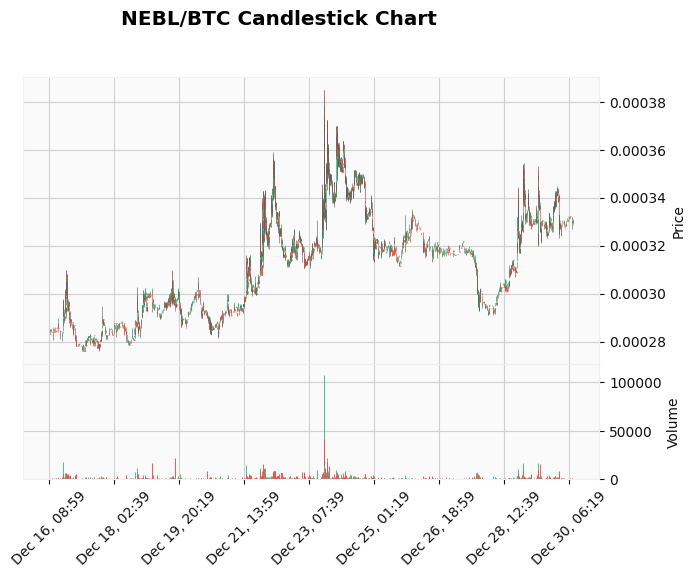

In [50]:
graph_klines(nebl_klines_1, 'NEBL')

/Users/joshuarenzodorado/pump-and-dump-dataset-master/project_env/lib/python3.13/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


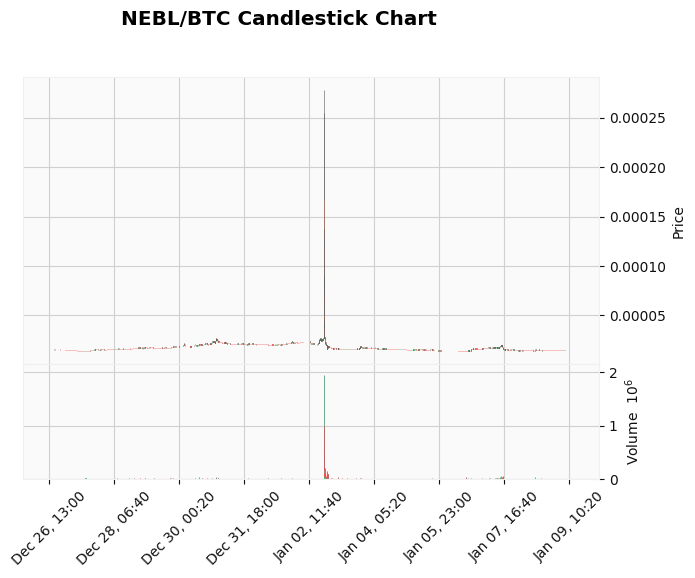

In [ ]:
graph_klines(nebl_klines_2, 'NEBL')

In [53]:
df = pd.DataFrame(nebl_klines_2, columns=[
      'Open time', 'Open', 'High', 'Low', 'Close', 'Volume',
      'Close time', 'Quote asset volume', 'Number of trades',
      'Taker buy base asset volume', 'Taker buy quote asset volume', 'Ignore'
  ])

In [56]:
import os

os.makedirs('data/kline', exist_ok=True)
df.to_csv('data/kline/nebl_klines_2.csv', index=False)